In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import preprocessing

In [3]:
train = pd.read_csv("../Data/siddharth_Microsoft_issueDataset.csv")
data = pd.read_csv("../Data/siddharth_Microsoft_holdoutDataset.csv")
dataset = data.copy()

In [8]:
train.loc[train["Recruiting Method Code"].isin([10000,88743,21249]),"Recruiting Method Code"] = "Other"
train.loc[train["HR Touchpoints"] >= 6,"HR Touchpoints"] = "> 6"
train.loc[train["Social Media Activity (Twitter, Facebook, Instagram)"].isin([6,7])
            ,"Social Media Activity (Twitter, Facebook, Instagram)"] = "Other"
train.loc[train["Survey, Relative, Attitude toward WorkType"].isin([7,8])
            ,"Survey, Relative, Attitude toward WorkType"] = "Other"
train.loc[train["Survey, Relative, Peer's Average Attitude toward Work/Life Balance"].isin([6,7])
            ,"Survey, Relative, Peer's Average Attitude toward Work/Life Balance"] = "Other"

In [4]:
dataset.loc[dataset["Recruiting Method Code"].isin([10000,88743,21249]),"Recruiting Method Code"] = "Other"
dataset.loc[dataset["HR Touchpoints"] >= 6,"HR Touchpoints"] = "> 6"
dataset.loc[dataset["Social Media Activity (Twitter, Facebook, Instagram)"].isin([6,7])
            ,"Social Media Activity (Twitter, Facebook, Instagram)"] = "Other"
dataset.loc[dataset["Survey, Relative, Attitude toward WorkType"].isin([7,8])
            ,"Survey, Relative, Attitude toward WorkType"] = "Other"
dataset.loc[dataset["Survey, Relative, Peer's Average Attitude toward Work/Life Balance"].isin([6,7])
            ,"Survey, Relative, Peer's Average Attitude toward Work/Life Balance"] = "Other"

In [53]:
def generateInteractions(dataset):
    index = 0
    for pair in itertools.combinations(independentVars,2):
        dataset["col_" + str(index)] = (dataset[pair[0]].astype(str) + "_" 
                                        + dataset[pair[1]].astype(str))
        index+=1
    return dataset
        
#dataset = generateInteractions(dataset)

In [9]:
dataset.head()

,LinkedIn Skill Code,Hired through SMTP,"Survey, Relative, Attitude toward Resources","Survey, Relative, Peer's Average Attitude toward Peers","Survey, Relative, Attitude toward Peers",National Origin (code),"Social Media Activity (Twitter, Facebook, Instagram)","Survey, Relative, Peer's Average Attitude toward Resources",EmployeeLeft,Years of Service,...,"Survey, Relative, Attitude toward Environment",Weekly Hours Worked,"Survey, Relative, Peer's Average Attitude toward WorkType","Survey, Relative, Attitude toward Work/Life Balance","Survey, Relative, Peer's Average Attitude toward Workload","Survey, Relative, Attitude toward Workload",Recruiting Method Code,Mentor Program Involvement (Scaled),"Survey, Relative, Attitude toward WorkType",HR Touchpoints
0,4,0,2,1,5,1,Other,7,1.0,2,...,4,42,3,5,6,4,Other,4,4,4
1,6,0,2,4,0,2,5,5,1.0,3,...,2,42,5,4,1,4,43747,5,5,2
2,2,0,2,2,5,0,2,1,0.0,1,...,4,39,4,3,2,2,54996,5,2,0
3,2,1,2,1,0,0,1,7,0.0,4,...,5,39,5,5,3,1,32498,6,5,0
4,4,0,4,0,0,1,4,6,0.0,3,...,5,33,5,3,1,2,66245,4,5,4


In [14]:
train["LinkedIn Skill Code"].value_counts()

74280    2043
22856    2032
10000    2028
61424    2000
35712    1997
87136    1958
48568    1942
Name: LinkedIn Skill Code, dtype: int64

In [23]:
list(np.unique(train["LinkedIn Skill Code"])) + list(np.unique(dataset["LinkedIn Skill Code"]))

[10000, 22856, 35712, 48568, 61424, 74280, 87136, 0, 1, 2, 3, 4, 5, 6]

In [15]:
dataset["LinkedIn Skill Code"].value_counts()

3    160
2    158
0    148
4    144
6    136
1    131
5    123
Name: LinkedIn Skill Code, dtype: int64

In [29]:
target = "EmployeeLeft"
independentVars = [col for col in dataset.columns if col != target]
le = preprocessing.LabelEncoder()

for col in independentVars:
    print(col)
    le.fit(list(np.unique(train[col])) + list(np.unique(dataset[col])))
    le.classes_
    dataset[col] = le.transform(dataset[col].astype(str))

LinkedIn Skill Code


ValueError: y contains previously unseen labels: '4'

In [22]:
from sklearn.model_selection import train_test_split

Y = dataset[target]
X = dataset[independentVars]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [27]:
X_train.to_csv("test")

In [57]:
estimator = DecisionTreeClassifier(max_depth = 5)
estimator.fit(X_train,y_train)

test_predict = estimator.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predict)

0.8225

In [57]:
featureImportance = pd.DataFrame(columns=["Feature", "Importance"])
_featImp = estimator.feature_importances_
for index in _featImp.argsort()[::-1]:
    featureImportance = featureImportance.append(
        {"Feature":independentVars[index],"Importance":_featImp[index]}, ignore_index = True)
featureImportance

,Feature,Importance
0,National Origin (code),0.527595
1,"Survey, Relative, Attitude toward Peers",0.246192
2,"Survey, Relative, Attitude toward WorkType",0.175964
3,"Salary Level, Relative to Peers (Grouped)",0.034160
4,"Survey, Relative, Attitude toward Resources",0.013938
5,"Survey, Relative, Attitude toward Workload",0.001560
6,"Survey, Relative, Attitude toward Environment",0.000362
7,Recruiting Method Code,0.000230
8,Hired through SMTP,0.000000
9,LinkedIn Skill Code,0.000000


In [ ]:
from xgboost import XGBClassifier
model  = XGBClassifier()
model.fit(X_train,y_train)

test_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predict)

In [69]:
#from sklearn.cross_validation import *
from sklearn.model_selection import GridSearchCV, StratifiedKFold

xgb_model  = XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [5,6,7],
              'min_child_weight': [10,11],
              'silent': [1],
              'subsample': [.5,.7],
              'colsample_bytree': [.6,.8],
              'n_estimators': [600,800,1000], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}

clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   scoring='accuracy',
                   verbose=2, refit=True)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  9.2min
[Parallel(n_jobs=5)]: Done 360 out of 360 | elapsed: 24.5min finished


[15:39:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     miss...
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.6, 0.8],
                         'learning_rate': [0.05], 'max_depth': [5, 6, 7],
                         'min_ch

In [72]:
clf.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 10,
 'missing': -999,
 'n_estimators': 600,
 'nthread': 4,
 'objective': 'binary:logistic',
 'seed': 1337,
 'silent': 1,
 'subsample': 0.7}

In [77]:
from xgboost import XGBClassifier
params = {'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 10,
 'missing': -999,
 'n_estimators': 600,
 'nthread': 4,
 'objective': 'binary:logistic',
 'seed': 1337,
 'subsample': 0.7}
model  = XGBClassifier(**params)
model.fit(X_train,y_train)

test_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predict)

0.9078571428571428

# Save model to disk

In [3]:
import pickle

In [79]:
# save the model to disk
filename = 'xyz_xgboost.pkl'
pickle.dump(model, open(filename, 'wb'))

In [4]:
# save the model to disk
filename = 'xyz_xgboost.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

In [5]:
loaded_model.feature_importances_

array([0.01902732, 0.05901571, 0.019581  , 0.02116114, 0.25948167,
       0.02057951, 0.05303173, 0.02033402, 0.02430013, 0.13576783,
       0.05666199, 0.01888779, 0.11130736, 0.03795147, 0.01986042,
       0.02028597, 0.02021777, 0.02127633, 0.02100435, 0.0201946 ,
       0.02007185], dtype=float32)

In [11]:
featureImportance = pd.DataFrame(columns=["Feature", "Importance"])
_featImp = loaded_model.feature_importances_
for index in _featImp.argsort()[::-1]:
    featureImportance = featureImportance.append(
        {"Feature":independentVars[index],"Importance":_featImp[index]}, ignore_index = True)

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

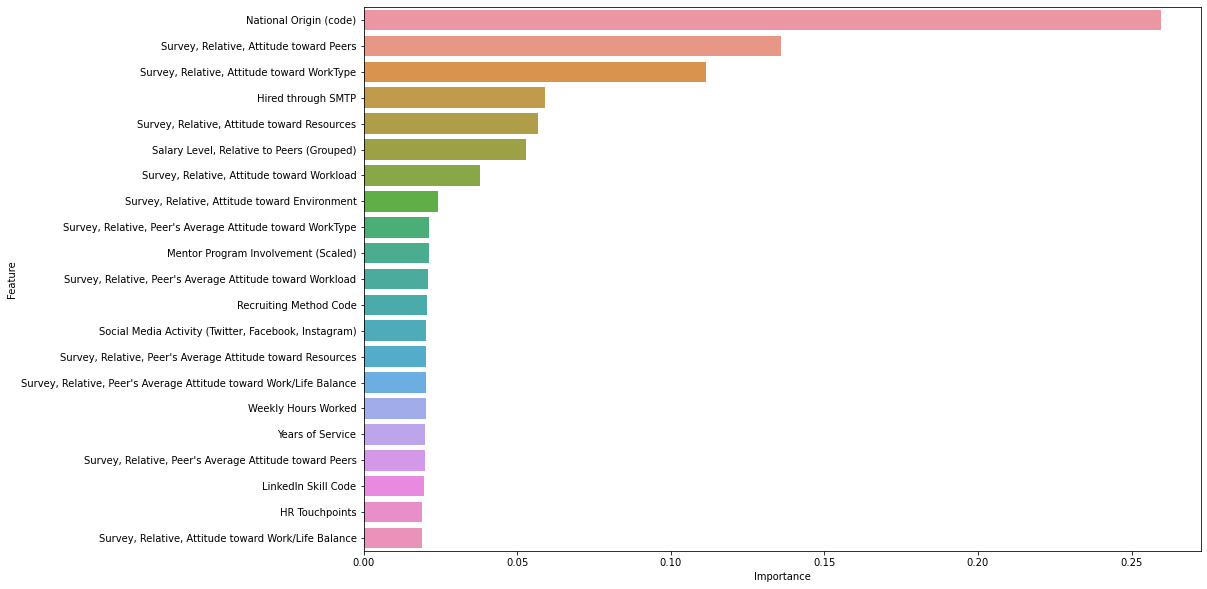

In [20]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(x = featureImportance["Importance"], y = featureImportance["Feature"])

In [42]:
import json
test = '{"data":[[1,0,1,4,0,1,0,2,1,2,4,4,5,1,3,6,0,3,1,4,4]]}'
data = np.array(json.loads(test))

In [45]:
tmp = pd.DataFrame(json.loads(test)["data"])
tmp.columns = independentVars
tmp

,HR Touchpoints,Hired through SMTP,LinkedIn Skill Code,Mentor Program Involvement (Scaled),National Origin (code),Recruiting Method Code,"Salary Level, Relative to Peers (Grouped)","Social Media Activity (Twitter, Facebook, Instagram)","Survey, Relative, Attitude toward Environment","Survey, Relative, Attitude toward Peers",...,"Survey, Relative, Attitude toward Work/Life Balance","Survey, Relative, Attitude toward WorkType","Survey, Relative, Attitude toward Workload","Survey, Relative, Peer's Average Attitude toward Peers","Survey, Relative, Peer's Average Attitude toward Resources","Survey, Relative, Peer's Average Attitude toward Work/Life Balance","Survey, Relative, Peer's Average Attitude toward WorkType","Survey, Relative, Peer's Average Attitude toward Workload",Weekly Hours Worked,Years of Service
0,1,0,1,4,0,1,0,2,1,2,...,4,5,1,3,6,0,3,1,4,4
